## Perth Basin Case Study using Loop2Flopy


In [159]:
import numpy as np
import pandas as pd
import numbers
import LoopStructural



### Importing Borehole Data


In [160]:
bore_info = pd.read_excel(
    "../data/Dwer_data\Formation picks.xls", sheet_name="bore_info"
)

strat_info = pd.read_excel(
    "../data/Dwer_data\Formation picks.xls", sheet_name="strat_info"
)



### Filter data

Crop to desired area and delete columns of less than 2 data points


In [161]:
df = bore_info.copy()
# x0, x1, y0, y1, z0, z1 = 355000, 402000, 6522000, 6534000, -1200, 200
x0, x1, y0, y1, z0, z1 = 354000, 407000, 6490000, 6545000, -1200, 300
, -1200, 200 # Whole Block
df = df.loc[(df["Northing"] >= y0)]
df = df.loc[(df["Northing"] <= y1)]
# df = df.loc[(df['Easting'] <= x1)]
df = df.drop(["Source"], axis=1)
# df = df.drop(['Tr','Tkm', 'Tk','Tkc','Jc','Kcom','Kps','Kpo','Kpc','Kcoh','Kcp'], axis=1)
# I think we need to keep this general so that we can apply it everywhere...
df = df.reset_index(drop=True)

df

,Easting,Northing,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,Kcl,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,364415.700000,6.544636e+06,NGG2A,27.000000,35,-,-,-,-,72,...,340,540,700,780,920,-,-,-,1020,NaN
1,402362.000000,6.544403e+06,RG2,162.000000,6,-,-,-,-,-,...,253,450,472,-,-,485,-,-,-,-
2,379899.500000,6.541566e+06,NGG3A,46.000000,35,-,-,-,-,-,...,-,150,240,260,450,-,-,-,575,NaN
3,354776.700000,6.540939e+06,NGG1A,29.000000,50,-,-,-,-,60,...,-,295,-,455,715,-,-,-,898,NaN
4,396856.000000,6.540170e+06,RAE 1,217.000000,12,-,-,-,-,-,...,83,137,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,383906.000000,6.491209e+06,LRB5,26.000000,51.2,NaN,NaN,NaN,NaN,NaN,...,184.7,388.2,407.2,NaN,849.7,NaN,NaN,NaN,1347,NaN
105,381036.000000,6.491169e+06,QO25,18.000000,45,-,-,-,-,-,...,117,204,-,-,-,-,-,-,-,-
106,402291.000000,6.491061e+06,AM29,48.000000,54,-,-,-,-,-,...,300,516,628,-,-,651,753,-,-,-
107,402250.400391,6.491056e+06,AM29B,48.901215,54.400013,NaN,NaN,NaN,NaN,NaN,...,306.053864,521.132019,583.753052,646.990356,NaN,NaN,NaN,NaN,739.600215,NaN


<bound method NDFrame.keys of            Easting      Northing     ID      Ground         TQ   Tr  Tkm   Tk  \
0    364415.700000  6.544636e+06  NGG2A   27.000000         35   -    -    -    
1    402362.000000  6.544403e+06    RG2  162.000000          6    -    -    -   
2    379899.500000  6.541566e+06  NGG3A   46.000000         35   -    -    -    
3    354776.700000  6.540939e+06  NGG1A   29.000000         50   -    -    -    
4    396856.000000  6.540170e+06  RAE 1  217.000000         12    -    -    -   
..             ...           ...    ...         ...        ...  ...  ...  ...   
104  383906.000000  6.491209e+06   LRB5   26.000000       51.2  NaN  NaN  NaN   
105  381036.000000  6.491169e+06   QO25   18.000000         45    -    -    -   
106  402291.000000  6.491061e+06   AM29   48.000000         54    -    -    -   
107  402250.400391  6.491056e+06  AM29B   48.901215  54.400013  NaN  NaN  NaN   
108  402299.000000  6.491054e+06   AM29   48.583523   54.19997  NaN  NaN  NaN  

(6490000.0, 6545000.0)

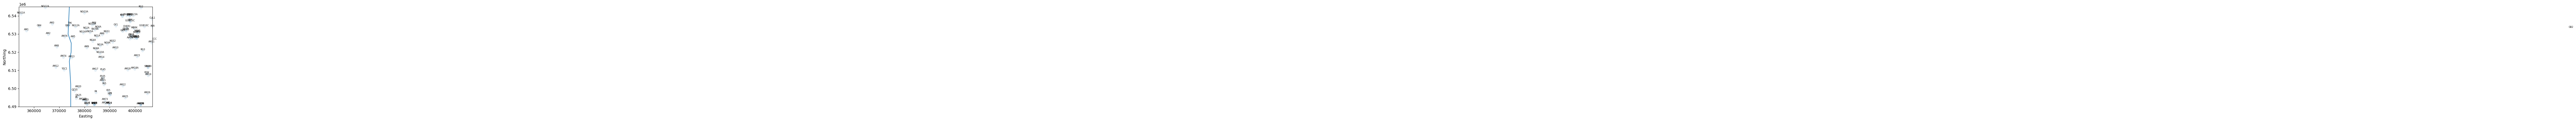

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt

print(df.keys)

# Plan of data points
plt.scatter(df.Easting, df.Northing, alpha = 0.1)
plt.xlabel("Easting")
plt.ylabel("Northing")
i = 0
for xi, yi in zip(df.Easting, df.Northing):
    plt.text(xi, yi, df.ID[i], va="bottom", ha="center", fontsize = 6)
    i += 1
fx = [374540,374540,374000,374700,374750,373500,374000,374000]
fy = [6490000,6502303,6515000,6520000,6525000,6530000,6545000,6550000]
plt.plot(fx,fy)
# plt.plot([fx1, fx2], [fy1, fy2])
# plt.plot(fault_center[0], fault_center[1], 'o')
plt.xlim(x0,x1)
plt.ylim(y0,y1)


In [163]:
lithcodes = list(df.columns.values[3:])  # Make a list of formations
df.Easting = pd.to_numeric(df.Easting)
df.Northing = pd.to_numeric(df.Northing)
df.Ground = pd.to_numeric(df.Ground)
#print(lithcodes)

In [164]:
strat = []
vdum = [ 38,
        -10,
        -52,
        -124,
        -320,
        -385,
        -435,
        -463,
        -472,
        -494,
        -549,
        -591,
        -657,
        -685,
        -732,
        -888,
        -947,
        -1029,
        -1109,
        -1884,
        -2156,
        -2214,
        -3214,
        -4214
        ]

for i, lith in enumerate(lithcodes):
    index = i
    lithid = i - 1
    val = vdum[i]
    sequence = strat_info.loc[strat_info["unit"] == lith, "sequence"].item()
    R = strat_info.loc[strat_info["unit"] == lith, "R"].item() / 255
    G = strat_info.loc[strat_info["unit"] == lith, "G"].item() / 255
    B = strat_info.loc[strat_info["unit"] == lith, "B"].item() / 255
    strat.append(
        [index, lithid, lith, sequence, val, [round(R, 2), round(G, 2), round(B, 2)]]
    )
strat = pd.DataFrame(strat)
strat.columns = ["index", "lithid", "lithcode", "sequences", "vals", "color"]


In [239]:

data_list = df.values.tolist()  # Turn data into a list of lists
formatted_data = []
for i in range(len(data_list)):  # iterate for each row
    end = False
    # okay, first we will establish the max value (i.e. the end of the hole)
    stuff = []
    for j in range(3, 26, 1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            stuff.append(data_list[i][j])

    EOH = max(stuff)
    #print(EOH)

    boreid = data_list[i][2]
    easting, northing = data_list[i][0], data_list[i][1]
    groundlevel = data_list[i][3]
    # First channp.nan, np.nan, np.nange - we can get the norms from the geophys data...
    gx, gy, gz = 0.0, 0.0, 1.0  # np.nan, np.nan,np.nan

    # Add data for groundlevel
    val = strat.vals[0]
    formatted_data.append(
        [
            boreid,
            easting,
            northing,
            groundlevel,
            val,
            "Ground",
            "Quaternary",
            gx,
            gy,
            gz,
        ]
    )  # eventually we cn get this from a dem...
    current_bottom = np.copy(groundlevel)

    if isinstance(data_list[i][4], numbers.Number) == True:
        bottom = groundlevel - float(data_list[i][4])  # Ground surface - TQ (mbgl)
        val = strat.vals[1]  # designated isovalue
        lithid = lithcodes[1]  # lithology id
        feat_name = strat.sequences[1]  # sequence name
        formatted_data.append(
            [boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz]
        )
        current_bottom = np.copy(bottom)
    non_conform = [0, #base Quaternary
                   4, #Base Tertiary
                   5, #Base lancelin
                   6, #Base Poison Hill
                   9,#Base Mirrabooka
                   12,#Base Henley
                   15,#Base Mariginiup
                   17,#Base Gage 
                   18,#Base Carnac
                   20,#Base Ottorowirri
                   21,#Base Yarragadee
                   22]
    #This will just tuck the feature up above the unconformity if it is the first in the strat column and absent"
    top_feat = [1,5,6,7,10,13,16,18,19] 
    non_conform_name = ["NC0","NC1","NC2","NC3","NC4","NC5","NC6","NC7","NC8","NC9","NC10","NC11"]
    #gx, gy, gz = np.nan, np.nan,np.nan
    # I know, I know, there isn't any of the tertiary one here, but in being thorough...
    for j in range(5, 26, 1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom = groundlevel - float(
                    data_list[i][j]
                )  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 3]  # designated isovalue
                end = False
            else:
                bottom = np.copy(current_bottom)  # Ground surface - TQ (mbgl)
                val = strat.vals[j - 4]  # designated isovalue
                end = True
            lithid = lithcodes[j - 3]  # lithology id
            feat_name = strat.sequences[j - 3]  # sequence name
            formatted_data.append(
                [boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz]
            )
            current_bottom = np.copy(bottom)
        #unconfirmities
            if strat.lithid[j - 3] in top_feat and EOH == False:
                val = strat.vals[j - 4]
                bdum = bottom+ 1.
                feat_name = strat.sequences[j - 3]
                lithid = lithcodes[j - 3]
                formatted_data.append(
                    [boreid, easting, northing, bdum, val, lithid, feat_name, gx, gy, gz]
                )         
        """elif end == False:
            if strat.lithid[j - 3] in top_feat:# or strat.lithid[j - 3] in top_feat in non_conform:
                val = strat.vals[j - 3]
                bdum = bottom+ (25.-j) *0.01
                feat_name = strat.sequences[j - 3]
                lithid = lithcodes[j - 3]
                formatted_data.append(
                    [boreid, easting, northing, bdum, val, lithid, feat_name, gx, gy, gz]
                ) """
        if strat.lithid[j - 3] in non_conform:
            if end == False:
                idx = non_conform.index(strat.lithid[j - 3])
                bottom = np.copy(current_bottom)
                val = 0.0
                lithid = non_conform_name[idx]
                feat_name = non_conform_name[idx] + '_FEAT' 
                formatted_data.append(
                    [boreid, easting, northing, bottom, val, lithid, feat_name, 0.0, 0.0, 1.0]
                )           
        





"""#Thomas Break up uncomformity 
X = np.loadtxt('../Geological_data/Geophysical_data/Thomas_transect/BU_thomas.dat')
for i in range(len(X)):
    val = 0.
    lithid = 'Warn_base'
    feat_name = 'WarnUC'
    formatted_data.append(['seis', X[i,0], X[i,1], X[i,2], val, lithid, feat_name, gx, gy, gz]) 

#Thomas Top_SPS
X = np.loadtxt('../Geological_data/Geophysical_data/Thomas_transect/Top_SPS_thomas.dat')
for i in range(len(X)):
    val = vdum[16]
    feat_name = strat.sequences[16] 
    lithid    = lithcodes[16]
    formatted_data.append(['seis', X[i,0], X[i,1], X[i,2], val, lithid, feat_name, gx, gy, gz])"""

data = pd.DataFrame(formatted_data)
data.columns = [
    "ID",
    "X",
    "Y",
    "Z",
    "val",
    "lithcode",
    "feature_name",
    "gx",
    "gy",
    "gz",
]

In [220]:
class GM:
    
    def __init__(self,basedata,origin,maximum,strat_column):
        self.basedata = basedata
        self.data = basedata #we will add to this 
        self.origin = origin
        self.maximum = maximum
        self.strat_colum = strat_column
        
        from LoopStructural import GeologicalModel
        geomodel_strat_column = GeologicalModel(
                        origin, maximum
                            )
        
        
    
    def add_fault(self,df_fp,dmax,cretaceous = True):
        
        
    def add_control_pointys(self,df_cp):
        
    def make_geo_model()

IndentationError: expected an indented block (2479540782.py, line 20)

In [221]:
data[-21:]

,ID,X,Y,Z,val,lithcode,feature_name,gx,gy,gz
1617,AM29,402299.0,6491054.0,-5.6164474033692,-124.0,Tk,Tertiary,0.0,0.0,1.0
1618,AM29,402299.0,6491054.0,-5.6164474033692,-320.0,Tkc,Tertiary,0.0,0.0,1.0
1619,AM29,402299.0,6491054.0,-5.6164474033692,-385.0,Kcl,Coolyena_1a,0.0,0.0,1.0
1620,AM29,402299.0,6491054.0,-5.6164474033692,-435.0,Kcp,Coolyena_1b,0.0,0.0,1.0
1621,AM29,402299.0,6491054.0,-5.6164474033692,-463.0,Kcg,Coolyena_2,0.0,0.0,1.0
1622,AM29,402299.0,6491054.0,-5.6164474033692,-472.0,Kcm,Coolyena_2,0.0,0.0,1.0
1623,AM29,402299.0,6491054.0,-97.3474,-549.0,Kcom,Coolyena_2,0.0,0.0,1.0
1624,AM29,402299.0,6491054.0,-97.3474002033692,0.0,NC4,NC4_FEAT,0.0,0.0,1.0
1625,AM29,402299.0,6491054.0,-112.416446,-591.0,Kcok,Coolyena_3,0.0,0.0,1.0
1626,AM29,402299.0,6491054.0,-142.416462,-685.0,Kcoh,Coolyena_3,0.0,0.0,1.0


In [240]:
Use_Lleyland = True
use_geophys = True
use_CP = True
#Has info on the unconformities and WaRNBRO
valdum = [38.,0.,0.,0.,-732,-888,-947,-1029,0][::-1]
feature = ['Quaternay','Quaternay','NC1_FEAT','NC5_FEAT',
           'Leederville','Leederville','Leederville'
           ,'Warnbro','NC7_FEAT'][::-1]

if Use_Lleyland:
    
    ddum = []
    Lley = pd.read_excel(
    "../data/Dwer_data\Formation picks.xls", sheet_name="Lleyland"
    )

    for i in range(len(Lley)):
        BoreID = Lley["Name"][i]
        X = Lley["East"][i]
        Y = Lley["North"][i]
        LSE = Lley["Ground"][i]
        ddum.append([BoreID, X, Y, LSE, valdum[-1], 'Lley', feature[-1], 0.0, 0.0, 1.0])
        ddum.append([BoreID, X, Y, LSE-Lley["Break up"][i], valdum[0], 'Lley', feature[0], 0.0, 0.0, 1.0]) 
        if type(Lley["SPS"][i]) == type(1):
            ddum.append([BoreID, X, Y, LSE-Lley["SPS"][i], valdum[1], 'Lley', feature[1], 0.0, 0.0, 1.0])
        if type(Lley["Maringiniup"][i]) == type(1):
            ddum.append([BoreID, X, Y, LSE-Lley["Maringiniup"][i], valdum[2], 'Lley', feature[2], 0.0, 0.0, 1.0])            
        ddum.append([BoreID, X, Y, LSE-Lley["Waneroo"][i], valdum[3], 'Lley', feature[3], 0.0, 0.0, 1.0])
        if type(Lley["Pinjar"][i]) == type(1):
            ddum.append([BoreID, X, Y, LSE-Lley["Pinjar"][i], valdum[4], 'Lley', feature[4], 0.0, 0.0, 1.0])                    
        ddum.append([BoreID, X, Y, LSE-Lley["Aptian"][i], valdum[5], 'Lley', feature[5], 0.0, 0.0, 1.0])   
        if type(Lley["Paleocene"][i]) == type(1):
            ddum.append([BoreID, X, Y, LSE-Lley["Paleocene"][i], valdum[5], 'Lley', feature[5], 0.0, 0.0, 1.0]) 
        ddum.append([BoreID, X, Y, LSE-Lley["TQ"][i], valdum[6], 'Lley', feature[6], 0.0, 0.0, 1.0]) 

    data = pd.concat([data,pd.DataFrame(ddum,columns = data.columns)])

if use_geophys:
    gphys = pd.read_excel(
    "../data/Dwer_data\Formation picks.xls", sheet_name="Other_constraints")
    ddum = []
    for i in range(len(gphys)):
        ddum.append(['GEO', gphys["Easting"][i], gphys["Northing"][i], gphys["z"][i], gphys["val"][i], 'GEO', gphys["Feature"][i], 0.0, 0.0, 1.0]) 
        
    data = pd.concat([data,pd.DataFrame(ddum,columns = data.columns)])   
set = 6   
if use_CP:
    CP = pd.read_excel(
    "../data/Dwer_data\Formation picks.xls", sheet_name="CP")
    CP = CP.loc[(CP["set"] == set)]
    CP = CP.reset_index(drop =True)
    ddum = []
    for i in range(len(CP)):
        ddum.append(['CP', CP["X"][i], CP["Y"][i], CP["Z"][i], CP["val"][i], 'CP', CP["Feature"][i], 0.0, 0.0, 1.0]) 
    data = pd.concat([data,pd.DataFrame(ddum,columns = data.columns)])

In [241]:
pd.DataFrame(ddum,columns = data.columns)


,ID,X,Y,Z,val,lithcode,feature_name,gx,gy,gz
0,CP,390000,6540000,200,-888,CP,Leederville,0.0,0.0,1.0


#### Fault stuff


In [242]:
# The Bado
fx = [374540,374540,374000,374700,374750,373500,374000,374000]
fy = [6490000,6502303,6515000,6520000,6525000,6530000,6545000,6550000]

fx1, fx2 = 373786, 373439
fy1, fy2 = 6528191, 6517059
fz = -800  # [-200,-500]

fault_azimuth = 90 - np.rad2deg(np.arctan(np.abs(fy2 - fy1) / np.abs(fx2 - fx1)))
fault_center = [fx1 + (fx2 - fx1) / 2, fy1 + (fy2 - fy1) / 2, fz]
fault_max_disp = 500.0  # 200?
fault_slip_vector = [0, 0, -1]
major_axis = (
    100000  # np.sqrt((fx2 - fx1)**2 + (fy2 - fy1)**2)/2 # fault_extent - along fault
)
minor_axis = 100000  # Fault_influence - orthogonal to fault
intermediate_axis = 0  # fault_vertical_radius
strike, dip = fault_azimuth, 296

# Make cloud of points along fault plane
'''nh = 50  # points  in x/y plane
x_array, y_array = [], []  # arrays to create points along fault
x_array.append(fx1)
y_array.append(fy1)
for i in range(nh - 2):
    x_array.append(fx1 + (i + 1) * (fx2 - fx1) / (nh - 1))
    y_array.append(fy1 + (i + 1) * (fy2 - fy1) / (nh - 1))
x_array.append(fx2)
y_array.append(fy2)'''



'''z_array = np.arange(-1000, 0, 50)'''

from LoopStructural.utils import strikedip2vector as strike_dip_vector
x = []
y = []
z = []
nx, ny, nz = [],[],[]
for ff in range (len(fx) - 1):
    dum_angle = np.rad2deg(np.arctan(np.abs(fy[ff+1] - fy[ff]) / np.abs(fx[ff+1] - fx[ff])))
    if fx[ff+1] > fx[ff]:
        fault_azimuth = 90 - dum_angle
    else:
        fault_azimuth = 90 - dum_angle
    strike, dip = fault_azimuth, 270
    nx1, ny1, nz1 = strike_dip_vector([strike], [dip])[0]
    for i in range (50):
        for k in range(20):
            x.append(fx[ff] + (fx[ff+1]-fx[ff])/49*float(i)-k*25.)
            y.append(fy[ff] + (fy[ff+1]-fy[ff])/49*float(i))
            z.append(-200-1000/19.* float(k) )
            nx.append(nx1)
            ny.append(ny1)
            nz.append(nz1)

                
                
    

#nv = len(z_array)  # points in z plane



#nx, ny, nz = strike_dip_vector([strike], [dip])[0]
#print(nx, ny, nz)

fault_plane_3d = []
"""for v in range(nv):  # vertical points
    for h in range(nh):  # horizontal points
        x, y, z = x_array[h], y_array[h], z_array[v]
        fault_plane_3d.append((x, y, z))
        df_new_row = pd.DataFrame.from_records(
            {
                "X": [x],
                "Y": [y],
                "Z": [z],
                "val": [0.0],
                "feature_name": ["Fault"],
                "nx": [nx],
                "ny": [ny],
                "nz": [nz],
            }
        )
        data = pd.concat([data, df_new_row], ignore_index=True)"""

for i in range(len(x)):
    fault_plane_3d.append((x[i], y[i], z[i]))
    df_new_row = pd.DataFrame.from_records(
        {
            "X": [x[i]],
            "Y": [y[i]],
            "Z": [z[i]],
            "val": [0.0],
            "feature_name": ["Fault"],
            "nx": [nx[i]],
            "ny": [ny[i]],
            "nz": [nz[i]],
        }
    )
    data = pd.concat([data, df_new_row], ignore_index=True)    

## ADD FAULT (this chunk given to me directly by Lachlan Grose to make an ellipsoid fault)
from LoopStructural.modelling.features.fault._fault_function import (
    CubicFunction,
    FaultDisplacement,
    Composite,
)

hw = CubicFunction()
hw.add_cstr(0, 1)
hw.add_grad(0, 0)
hw.add_cstr(1, 0)
hw.add_grad(1, 0)
hw.add_max(1)
fw = CubicFunction()
fw.add_cstr(0, -1)
fw.add_grad(0, 0)
fw.add_cstr(-1, 0)
fw.add_grad(-1, 0)
fw.add_min(-1)
gyf = CubicFunction()
gyf.add_cstr(-1, 0)
gyf.add_cstr(1, 0)
gyf.add_cstr(-0.2, 1)
gyf.add_cstr(0.2, 1)
gyf.add_grad(0, 0)
gyf.add_min(-1)
gyf.add_max(1)
gzf = CubicFunction()
gzf.add_cstr(-1, 0)
gzf.add_cstr(1, 0)
gzf.add_cstr(-0.2, 1)
gzf.add_cstr(0.2, 1)
gzf.add_grad(0, 0)
gzf.add_min(-1)
gzf.add_max(1)
gxf = Composite(hw, fw)
fault_displacement = None
fault_displacement = FaultDisplacement(gx=gxf, gy=gyf, gz=gzf)
faultfunction = fault_displacement

C:\Users\00098687\AppData\Local\Temp\ipykernel_22684\2418406960.py:41: RuntimeWarning: divide by zero encountered in long_scalars
  dum_angle = np.rad2deg(np.arctan(np.abs(fy[ff+1] - fy[ff]) / np.abs(fx[ff+1] - fx[ff])))


In [243]:
fault_plane_3d

[(374540.0, 6490000.0, -200.0),
 (374515.0, 6490000.0, -252.6315789473684),
 (374490.0, 6490000.0, -305.2631578947368),
 (374465.0, 6490000.0, -357.89473684210526),
 (374440.0, 6490000.0, -410.52631578947364),
 (374415.0, 6490000.0, -463.1578947368421),
 (374390.0, 6490000.0, -515.7894736842105),
 (374365.0, 6490000.0, -568.421052631579),
 (374340.0, 6490000.0, -621.0526315789473),
 (374315.0, 6490000.0, -673.6842105263158),
 (374290.0, 6490000.0, -726.3157894736842),
 (374265.0, 6490000.0, -778.9473684210526),
 (374240.0, 6490000.0, -831.578947368421),
 (374215.0, 6490000.0, -884.2105263157895),
 (374190.0, 6490000.0, -936.8421052631578),
 (374165.0, 6490000.0, -989.4736842105262),
 (374140.0, 6490000.0, -1042.1052631578946),
 (374115.0, 6490000.0, -1094.7368421052631),
 (374090.0, 6490000.0, -1147.3684210526317),
 (374065.0, 6490000.0, -1200.0),
 (374540.0, 6490251.081632653, -200.0),
 (374515.0, 6490251.081632653, -252.6315789473684),
 (374490.0, 6490251.081632653, -305.263157894736

In [226]:
z

[-200.0,
 -252.6315789473684,
 -305.2631578947368,
 -357.89473684210526,
 -410.52631578947364,
 -463.1578947368421,
 -515.7894736842105,
 -568.421052631579,
 -621.0526315789473,
 -673.6842105263158,
 -726.3157894736842,
 -778.9473684210526,
 -831.578947368421,
 -884.2105263157895,
 -936.8421052631578,
 -989.4736842105262,
 -1042.1052631578946,
 -1094.7368421052631,
 -1147.3684210526317,
 -1200.0,
 -200.0,
 -252.6315789473684,
 -305.2631578947368,
 -357.89473684210526,
 -410.52631578947364,
 -463.1578947368421,
 -515.7894736842105,
 -568.421052631579,
 -621.0526315789473,
 -673.6842105263158,
 -726.3157894736842,
 -778.9473684210526,
 -831.578947368421,
 -884.2105263157895,
 -936.8421052631578,
 -989.4736842105262,
 -1042.1052631578946,
 -1094.7368421052631,
 -1147.3684210526317,
 -1200.0,
 -200.0,
 -252.6315789473684,
 -305.2631578947368,
 -357.89473684210526,
 -410.52631578947364,
 -463.1578947368421,
 -515.7894736842105,
 -568.421052631579,
 -621.0526315789473,
 -673.6842105263158,
 

In [227]:
for lith in lithcodes:
    filtered_df = data[data.lithcode == lith]
    print(
        "\n Lithology = ",
        lith,
        "\n\n",
        filtered_df[
            ["ID", "X", "Y", "Z", "val", "lithcode", "feature_name", "gx", "gy", "gz"]
        ],
    )

filtered_df = data[data.lithcode == "Tert_base"]
print(
    "\n Lithology = ",
    lith,
    "\n\n",
    filtered_df[
        ["ID", "X", "Y", "Z", "val", "lithcode", "feature_name", "gx", "gy", "gz"]
    ],
)
filtered_df = data[data.lithcode == "Cool_base"]
print(
    "\n Lithology = ",
    lith,
    "\n\n",
    filtered_df[
        ["ID", "X", "Y", "Z", "val", "lithcode", "feature_name", "gx", "gy", "gz"]
    ],
)
filtered_df = data[data.lithcode == "Warn_base"]
print(
    "\n Lithology = ",
    lith,
    "\n\n",
    filtered_df[
        ["ID", "X", "Y", "Z", "val", "lithcode", "feature_name", "gx", "gy", "gz"]
    ],
)


 Lithology =  Ground 

          ID              X             Y          Z   val lithcode  \
0     NGG2A  364415.700000  6.544636e+06       27.0  38.0   Ground   
19      RG2  402362.000000  6.544403e+06      162.0  38.0   Ground   
37    NGG3A  379899.500000  6.541566e+06       46.0  38.0   Ground   
53    NGG1A  354776.700000  6.540939e+06       29.0  38.0   Ground   
70    RAE 1  396856.000000  6.540170e+06      217.0  38.0   Ground   
...     ...            ...           ...        ...   ...      ...   
1532   LRB5  383906.000000  6.491209e+06       26.0  38.0   Ground   
1557   QO25  381036.000000  6.491169e+06       18.0  38.0   Ground   
1568   AM29  402291.000000  6.491061e+06       48.0  38.0   Ground   
1588  AM29B  402250.400391  6.491056e+06  48.901215  38.0   Ground   
1613   AM29  402299.000000  6.491054e+06  48.583523  38.0   Ground   

     feature_name   gx   gy   gz  
0      Quaternary  0.0  0.0  1.0  
19     Quaternary  0.0  0.0  1.0  
37     Quaternary  0.0  0.0  

### Create Geomodel


In [244]:
from LoopStructural import GeologicalModel

origin = np.array([x0, y0, z0]).astype(float)
maximum = np.array([x1, y1, z1]).astype(float)

geomodel_strat_column = GeologicalModel(
    origin, maximum
)  # Made using unconformities and a strat column
geomodel_strat_column.data = data

In [245]:
origin, maximum

(array([ 3.54e+05,  6.49e+06, -1.20e+03]),
 array([4.070e+05, 6.545e+06, 3.000e+02]))

In [246]:
np.isnan(origin)

array([False, False, False])

In [247]:
data["Z"] = data["Z"].astype(float)

### Add surfaces


In [248]:
origin = np.array([3.55e05, 6.49e06, -1.20e03])
maximum = np.array([4.02e05, 6.54e06, 2.00e02])
# data = pd.read_csv("ls_data.csv")

geomodel_strat_column = GeologicalModel(
    origin, maximum
)  # Made using unconformities and a strat column
geomodel_strat_column.data = data

#First add the quaternary formations

Quat = geomodel_strat_column.create_and_add_foliation(
    "Quaternary", nelements=2e4, buffer=0.1
)

#This is the unconfrmity at the bas of the model
#UC0 = geomodel_strat_column.add_unconformity(geomodel_strat_column["Quaternary"], -10)
#When all present, the tertiary units appear conformable, so we can have them present


Tert = geomodel_strat_column.create_and_add_foliation(
    "Tertiary", nelements=1e4, buffer=0.1
)

#This is a seperate foliation for the tertiary unconformity
TertUC = geomodel_strat_column.create_and_add_foliation(
    "NC1_FEAT", nelements=1e4, buffer=0.1
)

UC1 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC1_FEAT"], 0.1
)



# The Coolyena is interesting, but the grouping have been made based on if the units appear conformable or not.
#The Lancelin gets it's own
Cool_1a = geomodel_strat_column.create_and_add_foliation(
    "Coolyena_1a", nelements=1e4, buffer=0.1
)

Lancelin_UC = geomodel_strat_column.create_and_add_foliation(
    "NC2_FEAT", nelements=1e4, buffer=0.1
)

UC2 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC2_FEAT"], 0
)



#The Poison Hill gets it's own
Cool_1b = geomodel_strat_column.create_and_add_foliation(
    "Coolyena_1b", nelements=1e4, buffer=0.1
)

Poison_hill_UC = geomodel_strat_column.create_and_add_foliation(
    "NC3_FEAT", nelements=1e4, buffer=0.1
)

UC3 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC3_FEAT"], 0
)


#Then I have grouped the Gingin Chalk. Molecap and... the mirrabooka. Now this is part of the osbourne, 
#but sometimes the Kardinya Shale is absent, so there can be mirabooka over Henley which makes life hard.

Cool_2 = geomodel_strat_column.create_and_add_foliation(
    "Coolyena_2", nelements=1e4, buffer=0.1
)

Mirrabooka_UC = geomodel_strat_column.create_and_add_foliation(
    "NC4_FEAT", nelements=1e4, buffer=0.1
)

UC4 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC4_FEAT"], 0
)



#Then I have the Kardinya and Henley together

Cool_3 = geomodel_strat_column.create_and_add_foliation(
    "Coolyena_3", nelements=1e4, buffer=0.1
)

Henley_UC = geomodel_strat_column.create_and_add_foliation(
    "NC5_FEAT", nelements=1e4, buffer=0.1
)


UC5 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC5_FEAT"], 0
)



#Then we add the Fault.

fault_slip_vector = [0.0, 0, 0.001]
major_axis = (
    100000  # np.sqrt((fx2 - fx1)**2 + (fy2 - fy1)**2)/2 # fault_extent - along fault
)
minor_axis = 100000  #

Fault_1 = geomodel_strat_column.create_and_add_fault(
    "Fault",
    displacement=150.0,
    fault_slip_vector=fault_slip_vector,
    #fault_center = fault_center,
    minor_axis=10000.,  # minor_axis,  # fault_influence
    #major_axis = major_axis, # fault_extent
    #intermediate_axis = 1000., # fault_vertical_radius
    faultfunction = faultfunction, #faultfunction in routines.ipynb
    # nelements=4000, steps=4, interpolatortype="FDI", buffer=0.3, solver='pyamg',
    force_mesh_geometry=True,
    nelements=1e3,
)


#Leederville units seem conformable

LEED = geomodel_strat_column.create_and_add_foliation(
    "Leederville", nelements=1e4, buffer=0.1
)

LEED_UC = geomodel_strat_column.create_and_add_foliation(
    "NC6_FEAT", nelements=1e4, buffer=0.1
)

UC6 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC6_FEAT"], 0
)


#SPS and/ or Gage can go missing 
WARN = geomodel_strat_column.create_and_add_foliation(
    "Warnbro", nelements=1e4, buffer=0.1
)

WARN_UC = geomodel_strat_column.create_and_add_foliation(
    "NC7_FEAT", nelements=1e4, buffer=0.1
)

UC7 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC7_FEAT"], 0
)

#Carnac is just unusual, but sometimes it can overly the ottorowirri directly.
CARN = geomodel_strat_column.create_and_add_foliation(
    "Carnac", nelements=1e4, buffer=0.1
)
"""
#UC8B = geomodel_strat_column.add_unconformity(
#    geomodel_strat_column["Carnac"], -1884)
"""
CARN_UC = geomodel_strat_column.create_and_add_foliation(
    "NC8_FEAT", nelements=1e4, buffer=0.1
)

UC8 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC8_FEAT"], 0
)
"""
#We can assume parmelia and ottorowirri are conformable.
PARM = geomodel_strat_column.create_and_add_foliation(
    "Parmelia", nelements=1e4, buffer=0.1
)

#UC9B = geomodel_strat_column.add_unconformity(
#    geomodel_strat_column["Carnac"], -2214)


PARM_UC = geomodel_strat_column.create_and_add_foliation(
    "NC9_FEAT", nelements=1e4, buffer=0.1
)

UC9 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC9_FEAT"], 0
)

YARR = geomodel_strat_column.create_and_add_foliation(
    "Yarragadee", nelements=1e4, buffer=0.1
)
"""


"""YARR_UC = geomodel_strat_column.create_and_add_foliation(
    "NC10_FEAT", nelements=1e4, buffer=0.1
)

UC10 = geomodel_strat_column.add_onlap_unconformity(
    geomodel_strat_column["NC10_FEAT"], 0
)"""



'YARR_UC = geomodel_strat_column.create_and_add_foliation(\n    "NC10_FEAT", nelements=1e4, buffer=0.1\n)\n\nUC10 = geomodel_strat_column.add_onlap_unconformity(\n    geomodel_strat_column["NC10_FEAT"], 0\n)'

### Add Stratigraphy Column


In [249]:
stratigraphic_column = {}
stratigraphic_column["Quaternary"] = {}
stratigraphic_column["Tertiary"] = {}
stratigraphic_column["Coolyena_1a"] = {}
stratigraphic_column["Coolyena_1b"] = {}
stratigraphic_column["Coolyena_2"] = {}
stratigraphic_column["Coolyena_3"] = {}
stratigraphic_column["Leederville"] = {}
stratigraphic_column["Warnbro"] = {}
stratigraphic_column["Carnac"] = {}
stratigraphic_column["Parmelia"] = {}
stratigraphic_column["Yarragadee"] = {}

tops = [0,2,6,7,8,11,14,17,19,20,22]
bots = [5,6,7,10,13,16,18,21,22]
for i in range(0, len(strat) - 1, 1):
    if i in tops:
        maxval = np.inf
    else:
        maxval = strat.vals[i - 1]
    if i in bots:
         minval = -np.inf
    else:
        minval = strat.vals[i]       
    stratigraphic_column[strat.sequences[i]][strat.lithcode[i]] = {
        "min": minval,
        "max": maxval,
        "id": i,
        "color": strat.color[i],
    }

geomodel_strat_column.set_stratigraphic_column(stratigraphic_column)
# geomodel_strat_column.update()

# geomodel_scalar_field.update()
stratigraphic_column

{'Quaternary': {'Ground': {'min': 38,
   'max': inf,
   'id': 0,
   'color': [1.0, 1.0, 1.0],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'TQ': {'min': -10,
   'max': 38,
   'id': 1,
   'color': [1.0, 1.0, 0.0],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])}},
 'Tertiary': {'Tr': {'min': -52,
   'max': inf,
   'id': 2,
   'color': [0.73, 0.6, 0.58],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Tkm': {'min': -124,
   'max': -52,
   'id': 3,
   'color': [1.0, 0.6, 0.2],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Tk': {'min': -320,
   'max': -124,
   'id': 4,
   'color': [1.12, 0.32, 0.16],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Tkc': {'min': -inf,
   'max': -320,
   'id': 5,
   'color': [1.0, 0.6, 0.2],
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])}},
 'Coolyena_1a': {'Kcl': {'min': -inf,
   'max': inf,
   'id': 6,
   'c

### 2D View


In [250]:
fault_max_disp

500.0

ERROR: 2024-05-22 10:28:37,792: geological_model.py:1540 -- Model does not contain Yarragadee
ERROR: 2024-05-22 10:28:37,793: geological_model.py:1540 -- Model does not contain Parmelia
ERROR: 2024-05-22 10:28:52,692: geological_model.py:1540 -- Model does not contain Yarragadee
ERROR: 2024-05-22 10:28:52,693: geological_model.py:1540 -- Model does not contain Parmelia
ERROR: 2024-05-22 10:29:07,212: geological_model.py:1540 -- Model does not contain Yarragadee
ERROR: 2024-05-22 10:29:07,213: geological_model.py:1540 -- Model does not contain Parmelia
ERROR: 2024-05-22 10:29:22,477: geological_model.py:1540 -- Model does not contain Yarragadee
ERROR: 2024-05-22 10:29:22,477: geological_model.py:1540 -- Model does not contain Parmelia


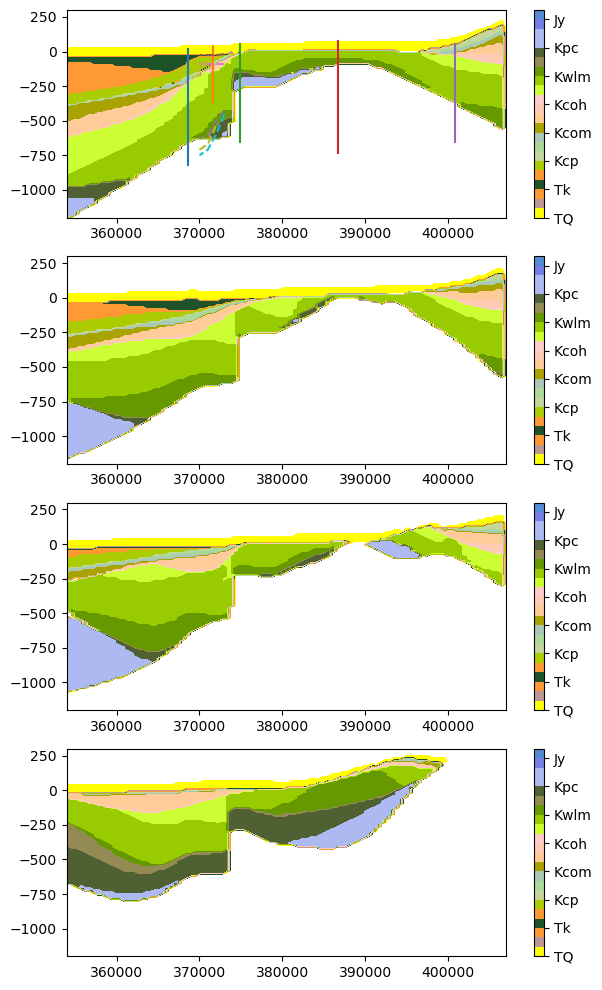

In [253]:
y_transects = [
    6515000,
    6522790,
    6527971,
    6540939,
]

delx, delz = 100, 100

x, z = np.linspace(x0, x1, delx), np.linspace(z0, z1, delz)

xx, zz = np.meshgrid(x, z)

V_strat_column = []

V_scalar_field = []
i = 0

plt.figure(figsize=(12, 10))

for i in range(4):

    yy = np.zeros_like(xx)

    yy[:] = y_transects[i]

    # X_sect = geomodel.evaluate_model(np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))

    # test = geomodel_strat_column.evaluate_feature_value(
    #     "Tertiary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # # plt.imshow(vals2)

    V_strat_column.append(
        geomodel_strat_column.evaluate_model(
            np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
        ).reshape(np.shape(xx))
    )
    plt.subplot(4, 2, i * 2 + 2)
    # plt.contourf(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "Warnbro", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     10,
    # )
    # plt.contourf(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     10,
    # )
    plt.contourf(
        xx,zz,V_strat_column[i],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,22],
        colors=strat["color"][1:],
    )
    if i == 0:
        plt.plot([368581,368581],[16,16-838])
        plt.plot([371647,371647],[39,39-405])
        plt.plot([374909,374909],[54,54-708])
        plt.plot([386758,386758],[75,75-810])
        plt.plot([400874,400874],[54,54-708])
        plt.plot([373000,372000,371000,370000],[-20,-25,-25,-25],'--')
        plt.plot([373000,372000,371000,370000],[-90,-90,-90,-90],'--')
        plt.plot([373000,372000,371000,370000],[-425,-500,-600,-630],'--')
        plt.plot([372000,371000,370000],[-540,-670,-710],'--')
        plt.plot([373000,372000,371000,370000],[-455,-600,-710,-750],'--')
        """plt.xlim(400000,401000)
        plt.ylim(-1200,80)"""
        
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(lithcodes[1:])
    # plt.title("Y = " + str(y_transects[i]) + " Strat Column")
    # plt.xticks(
    #     [0, 20, 40, 60, 80, 100],
    #     [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    # )
    # plt.xlabel("Easting (m)")
    # yticks = []
    # yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    # for ydum in yvals:
    #     n = np.argmin(abs(ydum - z))
    #     yticks.append(n)
    # plt.yticks(yticks, yvals)
    # plt.ylabel("z mAHD)")
    # plt.contour(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "Fault", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     [0],
    # )
    # # plt.contourf(
    # #     geomodel_strat_column.evaluate_feature_value(
    # #         "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # #     ).reshape(np.shape(xx)),
    # #     10,
    # # )
    # # plt.contourf(
    # #     geomodel_strat_column['Fault'].displacementfeature.evaluate_value(
    # #         geomodel_strat_column.scale(np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T)
    # #     ).reshape(np.shape(xx)),
    # #     10,
    # # )
    # plt.contour(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "CoolUC", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     0,
    # )
    # plt.contour(
    #     geomodel_strat_column.evaluate_feature_value(
    #         "WarnUC", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    #     ).reshape(np.shape(xx)),
    #     0,
    # )
    # # plt.contourf(
    # #     geomodel_strat_column.evaluate_feature_value(
    # #         "Fault", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # #     ).reshape(np.shape(xx)),
    # #     0,
    # )
plt.tight_layout()


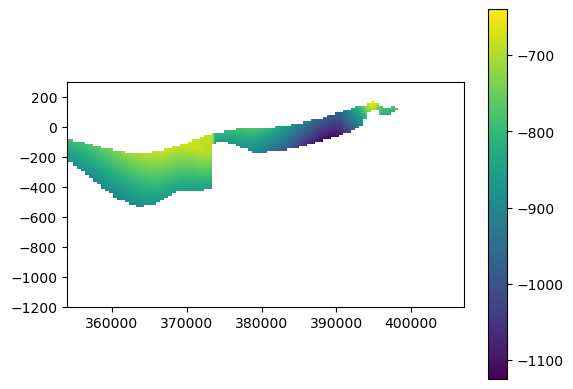

In [252]:
yy[:] = 6540000
test = geomodel_strat_column.evaluate_feature_value(
         "Leederville", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))

plt.imshow(test,origin = 'lower', extent = [x[0],x[-1],z[0],z[-1]], aspect = 20)
plt.colorbar()

In [ ]:
data.loc[(data["ID"] == 'AM14')]

In [ ]:
UC_list = ['NC9_FEAT','NC8_FEAT','NC7_FEAT','NC6_FEAT','NC5_FEAT','NC4_FEAT','NC3_FEAT',
          'NC2_FEAT','NC1_FEAT']
Feat_list = ['Parmelia','Carnac','Warnbro','Leederville','Coolyena_3','Coolyena_2',
             'Coolyena_1b', 'Coolyena_1a','Tertiary','Quaternay']

final = geomodel_strat_column.evaluate_feature_value(
         "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
for i in range(len(UC_list)):
    UC = geomodel_strat_column.evaluate_feature_value(
         UC_list[i], np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
    Feat = geomodel_strat_column.evaluate_feature_value(
         Feat_list[i], np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
    final[UC>0] = Feat[UC>0]
plt.imshow(final,origin = 'lower')



In [ ]:
test = geomodel_strat_column.evaluate_feature_value(
         "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
plt.imshow(test,origin = 'lower')
#plt.colorbar()

"""test = geomodel_strat_column.evaluate_feature_value(
         "Leederville", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
plt.imshow(test)
#plt.colorbar()

test = geomodel_strat_column.evaluate_feature_value(
         "Warnbro", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
plt.imshow(test)
#plt.colorbar()


test = geomodel_strat_column.evaluate_feature_value(
         "Carnac", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
plt.imshow(test)
#plt.colorbar()"""

test = geomodel_strat_column.evaluate_feature_value(
         "NC5_FEAT", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
plt.imshow(test,origin = 'lower')
#plt.colorbar()

"""test = geomodel_strat_column.evaluate_feature_value(
         "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
     ).reshape(np.shape(xx))
plt.imshow(test,origin = 'lower')"""
plt.colorbar()

In [ ]:
vf = geomodel_strat_column["Fault"][1].vector_field()

In [ ]:
ps = geomodel_strat_column.data[["X", "Y", "Z"]].values
vf = geomodel_strat_column["Fault"][1].evaluate_gradient(ps)

In [ ]:
import pyvista as pv

points = pv.PolyData(vf.locations)
points.point_data.set_vectors(vf.vectors, "vectors")
geom = pv.Arrow()

In [ ]:
vectorfield = points.glyph(
    scale="vectors", orient="vectors", geom=geom, tolerance=0.05, factor=100
)

In [428]:
vectorfield

PolyData (0x20d87d44040)
  N Cells:    9159
  N Points:   21513
  N Strips:   0
  X Bounds:   0.000e+00, 4.700e+04
  Y Bounds:   -1.000e-11, 4.898e+04
  Z Bounds:   -1.304e-05, 1.000e-01
  N Arrays:   2

In [ ]:
stratigraphic_column["Yarragadee"]Z

C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


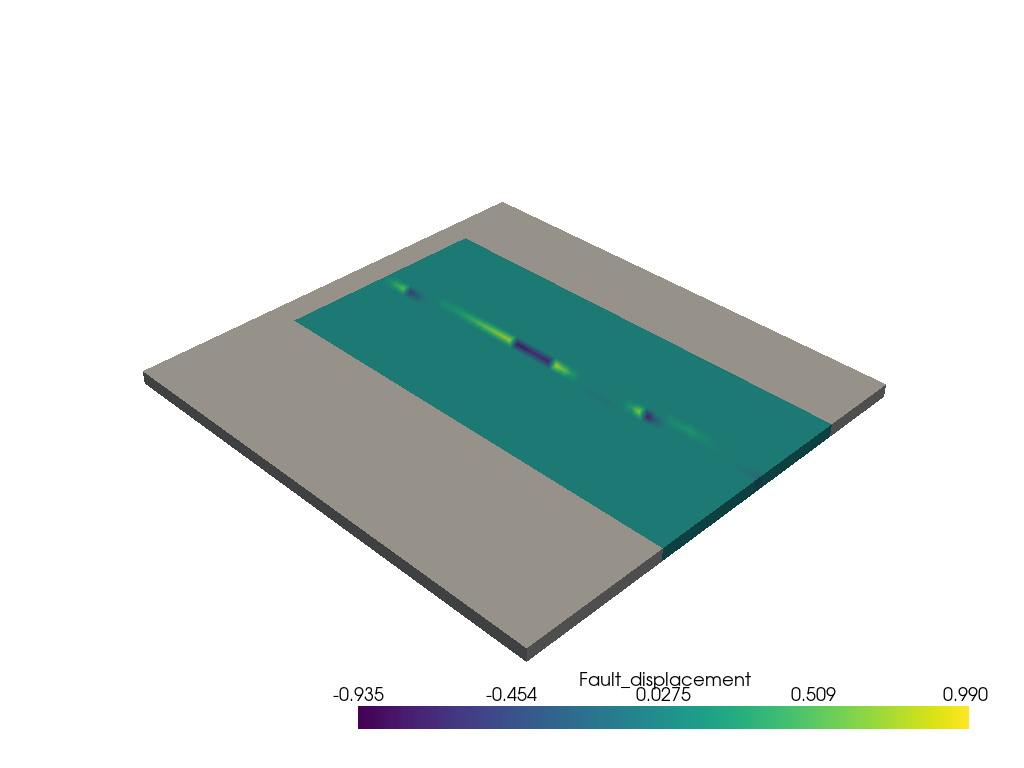

In [429]:
import pyvista as pv

p = pv.Plotter(notebook=True)
p.add_mesh(
    geomodel_strat_column["Fault"].displacementfeature.scalar_field(
        geomodel_strat_column.bounding_box
    )
)
# p.add_mesh(geomodel_strat_column["Fault"][0].surfaces(0)[0].vtk)
# for u in stratigraphic_column["Yarragadee"].values():
#     print(u["min"])
#     p.add_mesh(geomodel_strat_column["Yarragadee"].surfaces([u['min']])[0].vtk)
# p.add_mesh(geomodel_strat_column['CoolUC'].surfaces(0)[0].vtk)
p.show()

In [ ]:
geomodel_strat_column["Yarragadee"].faults

In [ ]:
geomodel_strat_column["Yarragadee"].surfaces(
    (
        geomodel_strat_column["Yarragadee"].max()
        - geomodel_strat_column["Yarragadee"].min()
    )
    + geomodel_strat_column["Yarragadee"].min()
)

In [89]:
geomodel_strat_column["Yarragadee"].faults

[]

In [ ]:
# plt.imshow(Lith,origin = 'lower')
plt.figure(figsize=(12, 10))
for i in range(4):
    # plt.subplot(4, 2, i * 2 + 1)
    # plt.contourf(
    #     V_scalar_field[i],
    #     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    #     colors=strat["color"][1:],
    # )
    # cbar = plt.colorbar()
    # cbar.ax.set_yticklabels(lithcodes[1:])
    # plt.title("Y = " + str(y_transects[i]) + " Scalar Field")
    # plt.xticks(
    #     [0, 20, 40, 60, 80, 100],
    #     [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    # )
    # plt.xlabel("Easting (m)")
    # yticks = []
    # yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    # for ydum in yvals:
    #     n = np.argmin(abs(ydum - z))
    #     yticks.append(n)
    # plt.yticks(yticks, yvals)
    # plt.ylabel("z mAHD)")

    plt.subplot(4, 2, i * 2 + 2)

    plt.contourf(
        V_strat_column[i],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        colors=strat["color"][1:],
    )
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(lithcodes[1:])
    plt.title("Y = " + str(y_transects[i]) + " Strat Column")
    plt.xticks(
        [0, 20, 40, 60, 80, 100],
        [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    )
    plt.xlabel("Easting (m)")
    yticks = []
    yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    for ydum in yvals:
        n = np.argmin(abs(ydum - z))
        yticks.append(n)
    plt.yticks(yticks, yvals)
    plt.ylabel("z mAHD)")

plt.tight_layout()

In [ ]:
geomodel_strat_column["Yarragadee"].faults[0][0].regions = []
geomodel_strat_column["Yarragadee"].faults[0][1].regions = []
geomodel_strat_column["Yarragadee"].faults[0][2].regions = []

In [ ]:
plt.figure(figsize=(12, 10))
# plt.contourf(
#     V_strat_column[i],
#     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
#     colors=strat["color"][1:],
# )
plt.contour(
    geomodel_strat_column.evaluate_feature_value(
        "Fault", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    ).reshape(np.shape(xx)),
    0,
)

In [ ]:
plt.figure(figsize=(12, 10))
# plt.contourf(
#     V_strat_column[i],
#     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
#     colors=strat["color"][1:],
# )
plt.contourf(
    geomodel_strat_column.evaluate_feature_value(
        "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    ).reshape(np.shape(xx)),
    10,
)
# # plt.contour(
# #     geomodel_strat_column.evaluate_feature_value(
# #         "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
# #     ).reshape(np.shape(xx)),
# #     [-10.],
# # )
# plt.contourf(
#     geomodel_strat_column.evaluate_feature_value(
#         "Tertiary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     10,
# )
# plt.contour(
#     geomodel_strat_column.evaluate_feature_value(
#         "Tertiary_unconformity", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     5,
# )
# plt.contourf(
#     geomodel_strat_column.evaluate_feature_value(
#         "Coolyena", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     10,
# )
# # plt.contour(
# #     geomodel_strat_column.evaluate_feature_value(
# #         "CoolUC_unconformity", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
# #     ).reshape(np.shape(xx)),

# # )
# # plt.contour(
# #     geomodel_strat_column.evaluate_feature_value(
# #         "Tertiary_unconformity", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
# #     ).reshape(np.shape(xx)),
# #     0,
# # )
# # plt.contourf(
# #     geomodel_strat_column.evaluate_feature_value(
# #         "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
# #     ).reshape(np.shape(xx)),
# #     0,
# # )
# plt.contourf(
#     geomodel_strat_column.evaluate_feature_value(
#         "Warnbro", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     10,
# )
# plt.contourf(
#     geomodel_strat_column.evaluate_feature_value(
#         "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
#     ).reshape(np.shape(xx)),
#     10,
# )
# tmp = np.copy(valsa)
# tmp[valsb > 0] = np.nan
# plt.contour(valsb, 0,color='black')
# plt.contour(vals3, 0, color="black")
# plt.contour(vals5, 0, color="black")
# # plt.contourf(dum,5)

In [ ]:
raise Exception

In [ ]:
plt.contour(valsb, 0)
plt.contour(vals3, 0)
plt.contour(vals5, 0)

In [ ]:
geomodel_strat_column["Tertiary"].regions

In [ ]:
y_transects = [
    6505000,
    6515000,
    6525000,
    6532000,
]

delx, delz = 100, 100

x, z = np.linspace(x0, x1, delx), np.linspace(z0, z1, delz)

xx, zz = np.meshgrid(x, z)

V_strat_column = []

V_scalar_field = []

test_val = []
for i in range(4):
    yy = np.zeros_like(xx)

    yy[:] = y_transects[i]
    pts = np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    pts = geomodel_strat_column.rescale(pts)

    tertiary_unconformity = (
        geomodel_strat_column["Tertiary_unconformity"]
        .evaluate_value(pts)
        .reshape(np.shape(xx))
    )

    test_val.append(tertiary_unconformity)

    # # X_sect = geomodel.evaluate_model(np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))

    # vals1 = geomodel_scalar_field.evaluate_feature_value(
    #     "Quaternary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # valsa = geomodel_scalar_field.evaluate_feature_value(
    #     "Tertiary", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # valsb = geomodel_scalar_field.evaluate_feature_value(
    #     "Tertiary_unconformity", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals2 = geomodel_scalar_field.evaluate_feature_value(
    #     "Coolyena", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals3 = geomodel_scalar_field.evaluate_feature_value(
    #     "CoolUC", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals4 = geomodel_scalar_field.evaluate_feature_value(
    #     "Warnbro", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals5 = geomodel_scalar_field.evaluate_feature_value(
    #     "WarnUC", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # vals6 = geomodel_scalar_field.evaluate_feature_value(
    #     "Yarragadee", np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
    # ).reshape(np.shape(xx))

    # # plt.imshow(vals2)

    # valsa[valsa > -10] = -10

    # valsa[valsa < -385] = -385

    # vals2[vals2 > -385] = -385

    # vals2[vals2 < -619] = -619

    # vals4[vals4 > -619] = -619

    # vals4[vals4 < -1043] = -1043

    # vals6[vals6 > -1043] = -1043

    # dum = np.ones_like(vals4) * -10000

    # dum[vals5 < 0] = vals6[vals5 < 0]

    # dum[vals5 > 0] = vals4[vals5 > 0]

    # dum[vals3 > 0] = vals2[vals3 > 0]

    # dum[valsb > 0] = valsa[valsb > 0]

    # dum[vals1 > -10] = vals1[vals1 > -10]

    # Lith = np.ones_like(dum) * -1

    # for i in range(len(vdum) - 2, -1, -1):

    #     Lith[dum > vdum[i]] = i

    # Lith[dum > 30.0] = 0

    V_scalar_field.append(Lith)

    V_strat_column.append(
        geomodel_strat_column.evaluate_model(
            np.array([xx.flatten(), yy.flatten(), zz.flatten()]).T
        ).reshape(np.shape(xx))
    )

In [ ]:
stratigraphic_column["Tertiary"]

In [ ]:
p = pv.Plotter()
p.add_mesh(model["Tertiary_unconformity"].surfaces(0)[0])
for unit in stratigraphic_column["Tertiary"].values():
    p.add_mesh(model[unit["feature"]].surfaces(0)[0])
p.set_scale(zscale=5)
p.show()

In [ ]:
test_val

In [ ]:
# plt.imshow(Lith,origin = 'lower')
plt.figure(figsize=(12, 10))
for i in range(4):
    # plt.subplot(4, 2, i * 2 + 1)
    # plt.contourf(
    #     V_scalar_field[i],
    #     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    #     colors=strat["color"][1:],
    # )
    # cbar = plt.colorbar()
    # cbar.ax.set_yticklabels(lithcodes[1:])
    # plt.title("Y = " + str(y_transects[i]) + " Scalar Field")
    # plt.xticks(
    #     [0, 20, 40, 60, 80, 100],
    #     [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    # )
    # plt.xlabel("Easting (m)")
    # yticks = []
    # yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    # for ydum in yvals:
    #     n = np.argmin(abs(ydum - z))
    #     yticks.append(n)
    # plt.yticks(yticks, yvals)
    # plt.ylabel("z mAHD)")

    plt.subplot(4, 2, i * 2 + 2)
    plt.contour(test_val[i], levels=[0], colors="black")
    plt.contourf(
        V_strat_column[i],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        colors=strat["color"][1:],
    )
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(lithcodes[1:])
    plt.title("Y = " + str(y_transects[i]) + " Strat Column")
    plt.xticks(
        [0, 20, 40, 60, 80, 100],
        [x0, x0 + 2000, x0 + 4000, x0 + 6000, x0 + 8000, x0 + 10000],
    )
    plt.xlabel("Easting (m)")
    yticks = []
    yvals = [-1200, -1000, -800, -600, -400, -200, 0, 200]
    for ydum in yvals:
        n = np.argmin(abs(ydum - z))
        yticks.append(n)
    plt.yticks(yticks, yvals)
    plt.ylabel("z mAHD)")

plt.tight_layout()